# **Phishing Website Detection Feature Extraction**



**1.   Data collection**
For this project, we need a bunch of urls of type legitimate (0) and phishing (1).

The collection of phishing urls is rather easy because of the opensource service called PhishTank. This service provide a set of phishing URLs in multiple formats like csv, json etc. that gets updated hourly. To download the data: https://www.phishtank.com/developer_info.php

For the legitimate URLs, I found a source that has a collection of benign, spam, phishing, malware & defacement URLs. The source of the dataset is University of New Brunswick, https://www.unb.ca/cic/datasets/url-2016.html. The number of legitimate URLs in this collection are 35,300. The URL collection is downloaded & from that, 'Benign_list_big_final.csv' is the file of our interest. This file is then uploaded to the Colab for the feature extraction.



In [ ]:
#importing required packages for this module
import pandas as pd

In [ ]:
#Downloading the phishing URLs file
!wget http://data.phishtank.com/data/online-valid.csv

URL transformed to HTTPS due to an HSTS policy
--2021-10-15 11:41:35--  https://data.phishtank.com/data/online-valid.csv
Resolving data.phishtank.com (data.phishtank.com)... 104.16.101.75, 104.17.177.85, 2606:4700::6810:654b, ...
Connecting to data.phishtank.com (data.phishtank.com)|104.16.101.75|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1634298105&Signature=tH2pHjecADN9oIzIWqCNGi7kW7aqwtMX7HNzPKKXGGLBn0o3kCNnQ63DPnkpoc9DXhKt1GoYv8WOAjEvbxq6pyW4gT30ij8j-KvpquxRyvXoRApPpY~i83~E-rK9rOaNFmNPcn7GWyPTaI9FvekdqCqhsbGL5H3KJgcRxcUl4-ptfqa4~lchgSQ5GkeQu~yCjPMnipGmg3GUGOEy~xZEiOcThUhagim9N93ifjwdDuTZbc2Kk2aERfO4Tc0DZ1q8HOhtUneQTy-ZkdnBYiWbbibdZ4cKy6bE3O5qjHXopb-prvyWk~M6lX8Oh2nagioqE7o30TuDP3j9SBUJa3-7IA__&Key-Pair-Id=APKAILB45UG3RB4CSOJA [following]
--2021-10-15 11:41:35--  https://cdn.phishtank.com/datadumps/verified_online.csv?Expires=1634298105&Signature=tH2pHjecADN9oIzIWqCNGi7kW7aqwtMX7HNzPK

In [ ]:
#loading the phishing URLs data to dataframe
data0 = pd.read_csv("online-valid.csv")
data0.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7321103,https://btinternethomes.weebly.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-10-15T11:15:48+00:00,yes,2021-10-15T11:18:54+00:00,yes,Other
1,7321102,https://amaznon.co.ip.jpb1ukk.cn/,http://www.phishtank.com/phish_detail.php?phis...,2021-10-15T11:13:15+00:00,yes,2021-10-15T11:18:54+00:00,yes,Other
2,7321100,https://gtyjfcdr666.weebly.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-10-15T11:08:49+00:00,yes,2021-10-15T11:18:54+00:00,yes,Other
3,7321099,https://west96coxdm.weebly.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-10-15T11:08:35+00:00,yes,2021-10-15T11:18:54+00:00,yes,Other
4,7321098,https://coxalershsjena.weebly.com/,http://www.phishtank.com/phish_detail.php?phis...,2021-10-15T11:08:28+00:00,yes,2021-10-15T11:18:54+00:00,yes,Other


In [ ]:
data0.shape

(11934, 8)

In [ ]:
#Collecting 5,000 Phishing URLs randomly
phishurl = data0.sample(n = 5000, random_state = 12).copy()
phishurl = phishurl.reset_index(drop=True)
phishurl.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7150046,http://kurdistan-gallery.com/suffix.php,http://www.phishtank.com/phish_detail.php?phis...,2021-06-01T19:30:12+00:00,yes,2021-07-23T13:44:01+00:00,yes,Other
1,7035087,http://www.support-verify-mydevices.com/Login.php,http://www.phishtank.com/phish_detail.php?phis...,2021-03-19T14:05:29+00:00,yes,2021-03-19T20:36:35+00:00,yes,Other
2,7173822,https://durablepools.com/bbsts/loading.php,http://www.phishtank.com/phish_detail.php?phis...,2021-06-14T04:46:51+00:00,yes,2021-06-14T04:51:44+00:00,yes,Other
3,7001123,https://www.umbrellaclubla.com/8sf7f57sf687a68...,http://www.phishtank.com/phish_detail.php?phis...,2021-03-05T02:08:50+00:00,yes,2021-03-07T20:31:30+00:00,yes,Other
4,6662284,http://gkjx168.com/images?us.battle.net/login/...,http://www.phishtank.com/phish_detail.php?phis...,2020-07-04T19:00:25+00:00,yes,2020-07-04T19:03:38+00:00,yes,Other


In [ ]:
phishurl.shape

(5000, 8)

## **1.1. Legitimate URLs:**



In [ ]:
#Loading legitimate files 
data1 = pd.read_csv("Benign_list_big_final.csv")
data1.columns = ['URLs']
data1.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


As stated above, 5000 legitimate URLs are randomaly picked from the above datafram


In [ ]:
#Collecting 5,000 Legitimate URLs randomly
legiurl = data1.sample(n = 5000, random_state = 12).copy()
legiurl = legiurl.reset_index(drop=True)
legiurl.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [ ]:
legiurl.shape

(5000, 1)

# **2. Feature Extraction:**

In this step, features are extracted from the URLs dataset.

The extracted features are categorized into


1.   Address Bar based Features
2.   Domain based Features
3.   HTML & Javascript based Features

In [ ]:
# importing required packages for this section
from urllib.parse import urlparse,urlencode
import ipaddress
import re

In [ ]:
# 1.Domain of the URL (Domain) 
def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [ ]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip


In [ ]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

In [ ]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

In [ ]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [ ]:
# 6.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [ ]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [ ]:
# 7. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [ ]:
# 8.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

In [ ]:
!pip install python-whois

     |████████████████████████████████| 91 kB 3.8 MB/s 
  Created wheel for python-whois: filename=python_whois-0.7.3-py3-none-any.whl size=87721 sha256=87bc4c60ea3069c2f6c4643c0955507c6222351f7f5da89659ccfef5e91996c9
  Stored in directory: /root/.cache/pip/wheels/11/05/f7/895ce5a73665f77c8274a7d55e34fb3e6b4abbb9a7637e215b
Successfully built python-whois


In [ ]:
# importing required packages for this section
import re
from bs4 import BeautifulSoup
import whois
import urllib
import urllib.request
from datetime import datetime

In [ ]:
# 9.Web traffic (Web_Traffic)
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [ ]:
# 10.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

# Computing URL features

In [ ]:
#Function to extract features
def featureExtraction(url,label):

  features = []
  #Address bar based features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))
  
  #Domain based features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  

  features.append(label)
  
  return features

In [ ]:
legiurl.shape

(5000, 1)

# Extracting the feautres & storing them in a list
legi_features = []
label = 0

for i in range(0, 5000):
  url = legiurl['URLs'][i]
  legi_features.append(featureExtraction(url,label))

In [ ]:
legiurl[1]

KeyError: ignored

In [ ]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Label']

legitimate = pd.DataFrame(legi_features, columns= feature_names)
legitimate.head()

NameError: ignored

In [ ]:
# Storing the extracted legitimate URLs fatures to csv file
legitimate.to_csv('legitimate.csv', index= False)

# 4.2. Phishing URLs:

In [ ]:
phishurl.shape

(5000, 8)

In [ ]:
#Extracting the feautres & storing them in a list
phish_features = []
label = 1
for i in range(0, 5000):
  url = phishurl['url'][i]
  phish_features.append(featureExtraction(url,label))

Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket
Error trying to connect to socket: closing socket


In [ ]:
#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix','DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Label']

phishing = pd.DataFrame(phish_features, columns= feature_names)
phishing.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Label
0,fr.imsly.com,0,0,1,2,0,0,0,0,0,0,1
1,softlille.com,0,0,1,4,0,0,0,0,1,1,1
2,nt-entreprises.com,0,1,1,5,0,0,1,0,1,0,1
3,pay.moban.com,0,0,0,1,0,0,0,0,1,0,1
4,live-uk-chat.co.uk,0,0,0,1,0,1,1,0,1,0,1


In [ ]:
# Storing the extracted legitimate URLs fatures to csv file
phishing.to_csv('phishing.csv', index= False)

## **5. Final Dataset**


In [ ]:
#Concatenating the dataframes into one 
urldata = pd.concat([legitimate, phishing]).reset_index(drop=True)
urldata.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,1,1,0
1,ecnavi.jp,0,0,1,1,0,0,0,0,1,1,0
2,hubpages.com,0,0,1,1,0,0,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0
4,icicibank.com,0,0,1,3,0,0,0,0,1,0,0


In [ ]:
urldata.tail()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Label
9995,mpnleiblepeanrjfdlzabmruiy-dot-gl099898987fhkl...,0,0,1,0,0,1,1,1,1,1,1
9996,sparxinteriors.co.zw,0,0,0,2,0,0,0,0,0,1,1
9997,sparkassenkundendienstservice02.xyz,0,0,0,1,0,0,0,0,1,0,1
9998,tracylalla.com,0,0,0,2,0,0,0,0,1,0,1
9999,hsv-k12-org.ml,0,0,0,0,0,0,1,0,1,1,1


In [ ]:
urldata.shape

(10000, 12)

In [ ]:
# Storing the data in CSV file
urldata.to_csv('urldata.csv', index=False)

# ***Classifiers***
1.   Loading Data 



In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

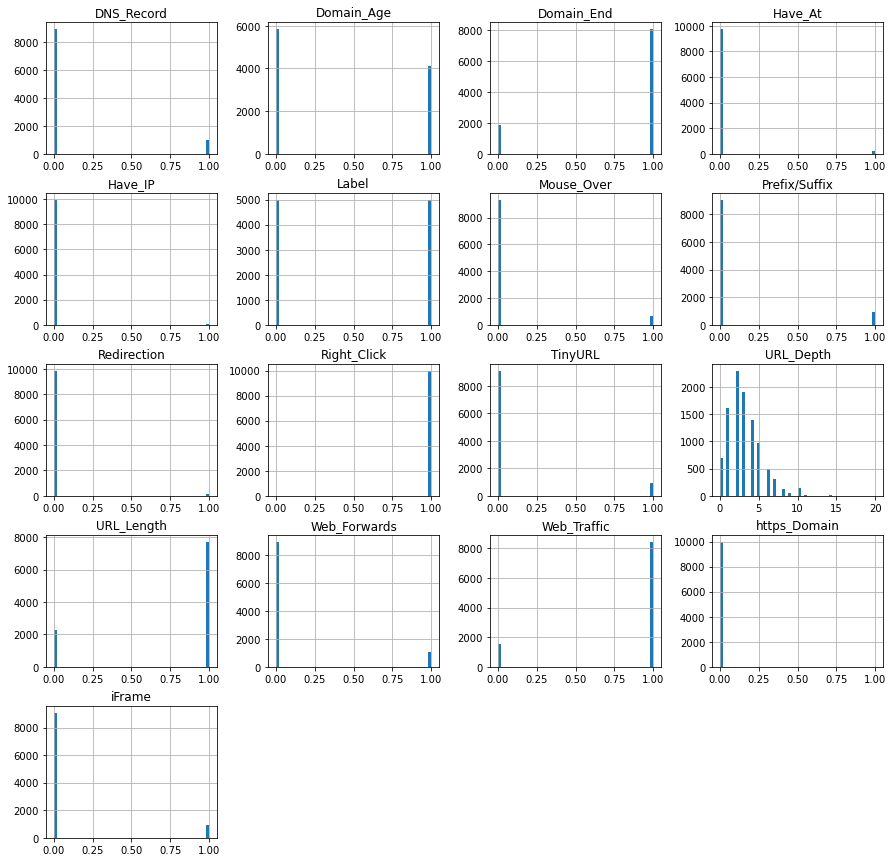

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

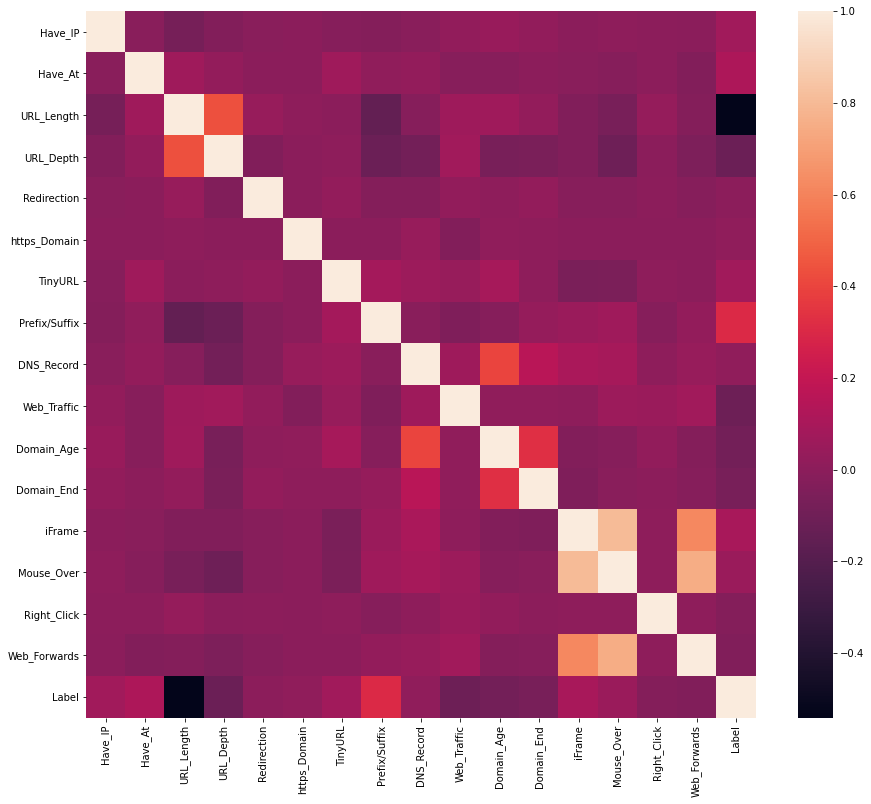

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

#   Data Preprocessing



In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [ ]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [ ]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,3,0,0,0,0,1,1,1,1,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1
4,0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0



3.   Splitting the data



In [ ]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# This section is for Performance results

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Classifier: Decision Tree

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 10)
# fit the model 
tree.fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=10)
scores.mean()

0.8300000000000001

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

Performance Evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = scores.mean()
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.830
Decision Tree: Accuracy on test Data: 0.834


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Classifier: Random Forest

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=10)

# fit the model 
forest.fit(X_train, y_train)
scores = cross_val_score(forest, X_train, y_train, cv=10)
scores.mean()

0.836125

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

Performance Evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = scores.mean()
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.836
Random forest: Accuracy on test Data: 0.850


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# XGBoost Classifier 

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=10)
#fit the model
xgb.fit(X_train, y_train)
scores = cross_val_score(xgb, X_train, y_train, cv=10)
scores.mean()

[19:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HASNAE\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.85725

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

Performance evaluation

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = scores.mean()
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.857
XGBoost : Accuracy on test Data: 0.873


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# **Classifier: Artificial Neural Network**

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:

from sklearn.preprocessing import StandardScaler                   # for normalization of our data
from keras.wrappers.scikit_learn import KerasClassifier            #package allowing keras to work with python
from sklearn.model_selection import cross_val_score, GridSearchCV  #using Kfold and if needed, GridSearch object in analysis
from sklearn.utils import shuffle                                  # shuffling our own made dataset
from keras.models import Sequential                                # linear layer stacks model for keras
from keras.layers import Dense, Dropout     

In [ ]:
    epoch = 20
        
    classifier = Sequential()
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform', input_dim = 16))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.add(Dense(units = 40, activation='relu',kernel_initializer='uniform'))      
    #classifier.add(Dropout(p= 0.1))   
    classifier.add(Dense(units = 1, activation='sigmoid',kernel_initializer='uniform'))
    #classifier.add(Dropout(p= 0.1))
    classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    history = classifier.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
250/250 [==============================] - 1s 1ms/step - loss: 0.6553 - accuracy: 0.5990 - val_loss: 0.4152 - val_accuracy: 0.8110
Epoch 2/20
250/250 [==============================] - 0s 708us/step - loss: 0.4211 - accuracy: 0.8005 - val_loss: 0.3968 - val_accuracy: 0.8185
Epoch 3/20
250/250 [==============================] - 0s 661us/step - loss: 0.3953 - accuracy: 0.8148 - val_loss: 0.4320 - val_accuracy: 0.7865
Epoch 4/20
250/250 [==============================] - 0s 735us/step - loss: 0.3991 - accuracy: 0.8073 - val_loss: 0.3748 - val_accuracy: 0.8325
Epoch 5/20
250/250 [==============================] - 0s 658us/step - loss: 0.3700 - accuracy: 0.8242 - val_loss: 0.3756 - val_accuracy: 0.8355
Epoch 6/20
250/250 [==============================] - 0s 666us/step - loss: 0.3731 - accuracy: 0.8240 - val_loss: 0.3897 - val_accuracy: 0.8115
Epoch 7/20
250/250 [==============================] - 0s 666us/step - loss: 0.3744 - accuracy: 0.8221 - val_loss: 0.3656 - val_accuracy: 0

In [ ]:
scores.mean()

0.860125

Performance Evaluation

In [ ]:
scores = cross_val_score(
                        estimator=classifier, 
                        X = X_train,
                        y = y_train,
                        cv=10)
#scores.mean()

In [ ]:
y_test_ann  = classifier.predict(X_test)
y_train_ann = classifier.predict(X_train)

In [ ]:
acc_train_ann = classifier.evaluate(X_train,y_train)[1]
acc_test_ann = classifier.evaluate(X_test,y_test)[1]

print('\nANN: Accuracy on training Data: {:.3f}' .format(acc_train_ann))
print('ANN: Accuracy on test Data: {:.3f}' .format(acc_test_ann))

63/63 [==============================] - 0s 515us/step - loss: 0.3541 - accuracy: 0.8550

ANN: Accuracy on training Data: 0.848
ANN: Accuracy on test Data: 0.855


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('ANN', acc_train_ann, acc_test_ann)

# **Classifier: Convolutional Neural Network**


In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv1D,MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


epoch = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.summary()

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 15, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 14, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)              

In [ ]:
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
epoch = 20
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

#model.summary()

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_test, y_test), verbose=1)
# classifier = KerasClassifier(build_fn= CNN_builder,
#                              batch_size = 10,
#                              nb_epoch = 100)
scores = cross_val_score(classifier, X_train, y_train, cv=10)

Epoch 1/20
250/250 [==============================] - 2s 3ms/step - loss: 0.9586 - accuracy: 0.5522 - val_loss: 0.5983 - val_accuracy: 0.7425
Epoch 2/20
250/250 [==============================] - 1s 2ms/step - loss: 0.6553 - accuracy: 0.6602 - val_loss: 0.5201 - val_accuracy: 0.7950
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5747 - accuracy: 0.6998 - val_loss: 0.4877 - val_accuracy: 0.7740
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5421 - accuracy: 0.7308 - val_loss: 0.4721 - val_accuracy: 0.7735
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.7499 - val_loss: 0.4575 - val_accuracy: 0.7990
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4961 - accuracy: 0.7503 - val_loss: 0.4439 - val_accuracy: 0.8010
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4898 - accuracy: 0.7524 - val_loss: 0.4389 - val_accuracy: 0.8100
Epoch 

Performance evaluation

In [ ]:
acc_train_cnn = scores.mean()
acc_test_cnn = model.evaluate(X_test, y_test)[1]

print('\nCNN: Accuracy on training Data: {:.3f}' .format(acc_train_cnn))
print('CNN: Accuracy on test Data: {:.3f}' .format(acc_test_cnn))

63/63 [==============================] - 0s 753us/step - loss: 0.4035 - accuracy: 0.8140

CNN: Accuracy on training Data: 0.762
CNN: Accuracy on test Data: 0.814


Storing the results

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('CNN', acc_train_cnn, acc_test_cnn)

# Performance Comparison

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.830,0.834
1,Random Forest,0.836,0.850
2,XGBoost,0.857,0.872
3,ANN,0.848,0.855
4,CNN,0.762,0.814


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.857,0.872
3,ANN,0.848,0.855
1,Random Forest,0.836,0.850
0,Decision Tree,0.830,0.834
4,CNN,0.762,0.814


In [ ]:
# # Save model
# model.save("CNN-Antiphishing")

INFO:tensorflow:Assets written to: CNN-Antiphishing\assets
